In [1]:
import sys

sys.path.append("../")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.util.testing import assert_frame_equal
from TFM import DPF, TFF
np.random.seed(10)

ipykernel_launcher:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [2]:
path_A = "./PIV_A001_stack.txt"
piv_A001 = DPF.load_DPF(path_A)
path_B = "./PIV_B001_stack.txt"
piv_B001 = DPF.load_DPF(path_B)

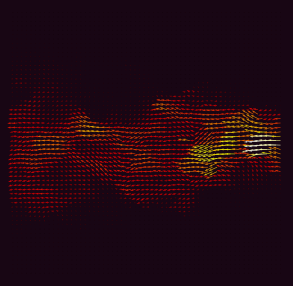

In [3]:
piv_A001.draw()

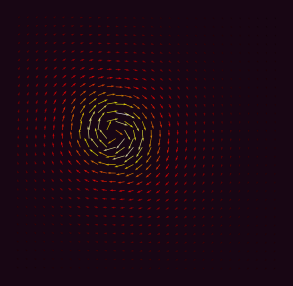

In [4]:
piv_B001.draw()

../TFM/utils.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  G0 = 2 * (1 + mu) / (E * pow(k, 3))
../TFM/utils.py:22: RuntimeWarning: invalid value encountered in multiply
  G *= G0


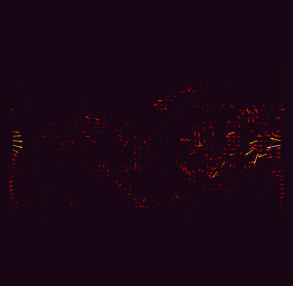

In [5]:
res_A = piv_A001.fftc()
res_A.draw()

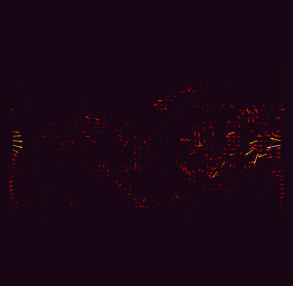

In [6]:
expected_A = TFF.load_TFF(path="./Traction_PIV_A001_stack_L_0.txt")
expected_A.draw()
assert_frame_equal(res_A, expected_A)

../TFM/utils.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  G0 = 2 * (1 + mu) / (E * pow(k, 3))
../TFM/utils.py:22: RuntimeWarning: invalid value encountered in multiply
  G *= G0


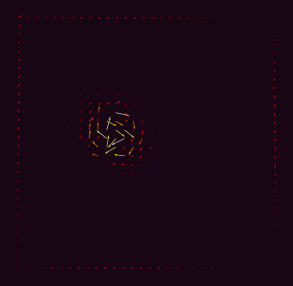

In [7]:
res_B = piv_B001.fftc()
res_B.draw()

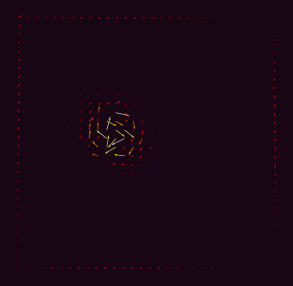

In [8]:
expected_B = TFF.load_TFF(path="./Traction_PIV_B001_stack.txt")
expected_B.draw()
assert_frame_equal(res_B, expected_B)

../TFM/utils.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  G0 = 2 * (1 + mu) / (E * pow(k, 3))
../TFM/utils.py:22: RuntimeWarning: invalid value encountered in multiply
  G *= G0


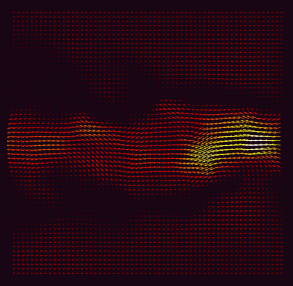

In [9]:
res = piv_A001.fftc(L=0.005)
res.draw()

In [10]:
# 　元となるTFFのリストを生成
data = TFF.generate_fields(
    nCol=200,
    nRow=200,
    size=200,
    mode="cGL",
    info={"a": 0.5, "b": 0.1, "dx": 1, "dt": 0.01},
)

In [11]:
# 　ノイズの追加
data_noise = []
for df in data:
    ndf = df.copy()
    nCol, nRow, _ = df.get_Dimensions()
    mx = df.loc[:, "vx"].abs().mean() * 0.05
    my = df.loc[:, "vy"].abs().mean() * 0.05
    ndf.loc[:, "vx"] += np.random.normal(0, mx, nCol * nRow)
    ndf.loc[:, "vy"] += np.random.normal(0, my, nCol * nRow)
    data_noise.append(ndf)

In [12]:
# 　DPFへの変換
# 　train_noiseにはノイズを追加
train = [x.inv_fftc(noise_flag=False) for x in data]
train_noise = [x.inv_fftc(noise_ratio=0.05) for x in data_noise]

In [13]:
result = TFF.kalman_FFTC(data=train[:101])

../TFM/fields.py:374: ComplexWarning: Casting complex values to real discards the imaginary part
  H[o : o + 2, o : o + 2] = G
../TFM/fields.py:375: ComplexWarning: Casting complex values to real discards the imaginary part
  H[o + 2 : o + 4, o + 2 : o + 4] = G


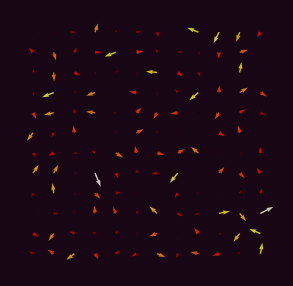

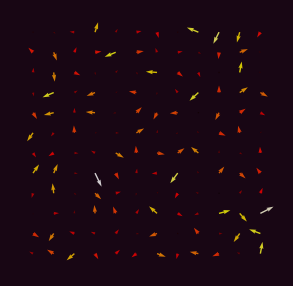

In [14]:
data[1].draw()
result[0].draw()

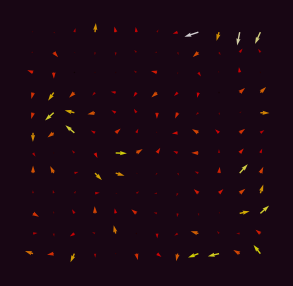

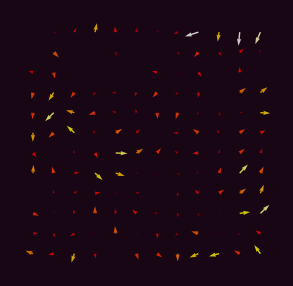

In [15]:
data[21].draw()
result[20].draw()

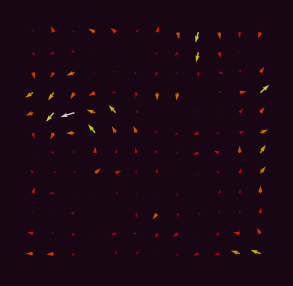

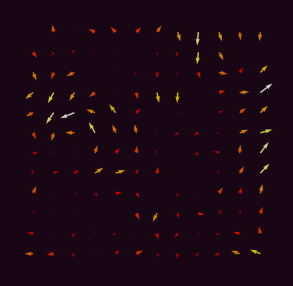

In [16]:
data[51].draw()
result[50].draw()

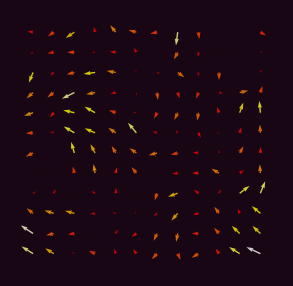

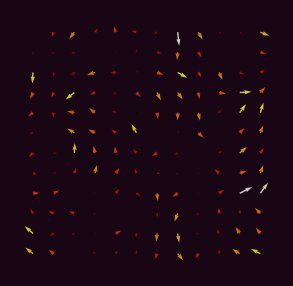

In [17]:
data[100].draw()
result[99].draw()